In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check Missing Values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


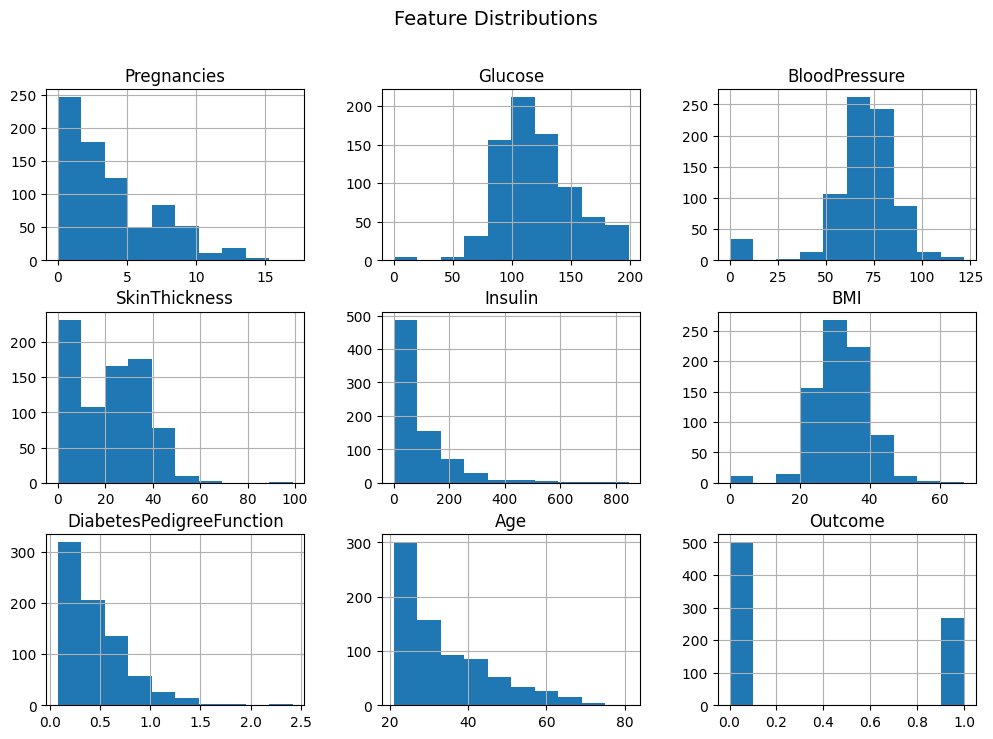

In [5]:
# Data Distribution (EDA)
df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

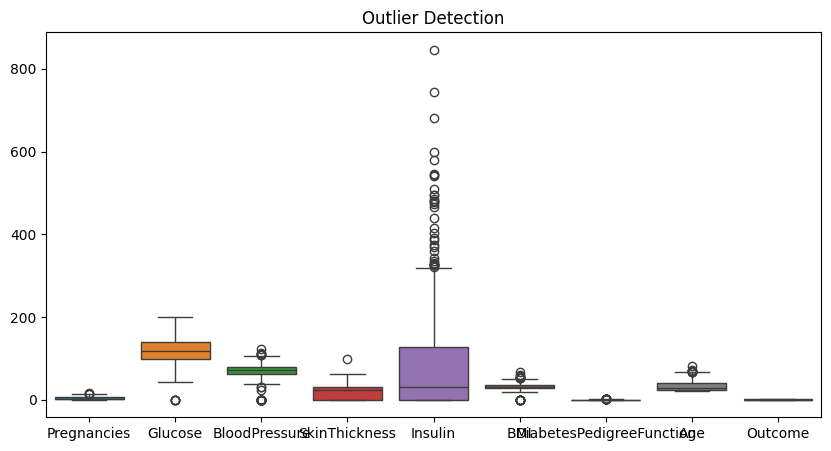

In [6]:
# Boxplot to check outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()

In [7]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

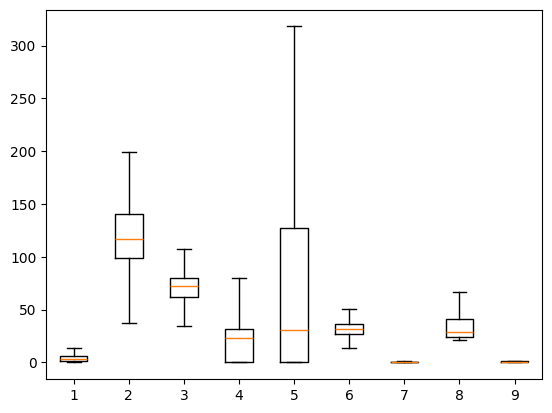

In [8]:
plt.boxplot(df)
plt.show()

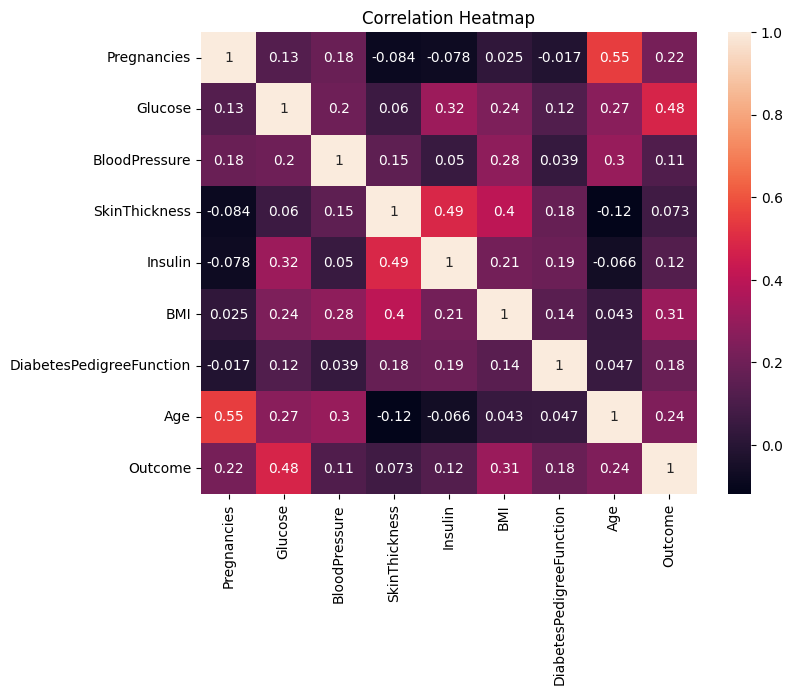

In [9]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Preprocessing
# Replace 0 values in specific medical columns (they can't be zero physiologically)
cols_to_fix = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
# Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
# LightGBM Model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [15]:
# Predictions & Evaluation
lgb_pred = lgb_model.predict(X_test)
print("\nLightGBM Results:")
print(classification_report(y_test, lgb_pred))


LightGBM Results:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154



In [16]:
# XGBoost Model
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Optional[float]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[str], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = loa

In [17]:
# Predictions & Evaluation
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154






**DIABETES DATASET ANALYSIS REPORT**

**Dataset Overview:**
- 768 patient records with clinical measurements
- 8 feature variables + 1 target variable (Outcome)
- Binary classification: Diabetic (1) vs Non-diabetic (0)

**Key Findings:**

**Data Quality:**
- Several features contain biologically impossible zero values (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
- These zeros likely represent missing data that requires imputation
- No explicit null values, but zeros function as missing data markers

**Class Distribution:**
- Non-diabetic cases (0): Approximately 500 records (65%)
- Diabetic cases (1): Approximately 268 records (35%)
- Moderate class imbalance present

**Comparative Analysis - Diabetic vs Non-diabetic Groups:**

**Glucose Levels:**
- Diabetic patients: Average ~141 mg/dL
- Non-diabetic patients: Average ~110 mg/dL
- Clear separation makes this the strongest predictor

**BMI (Body Mass Index):**
- Diabetic patients: Average ~35.4
- Non-diabetic patients: Average ~30.9
- Higher BMI correlates with diabetes risk

**Age Distribution:**
- Diabetic patients: Average ~37 years
- Non-diabetic patients: Average ~31 years
- Age is a significant risk factor

**Pregnancies:**
- Diabetic patients: Average ~4.9 pregnancies
- Non-diabetic patients: Average ~3.8 pregnancies
- Higher pregnancy count associated with increased risk

**Other Notable Patterns:**
- DiabetesPedigreeFunction (genetic risk) tends to be higher in diabetic group
- Blood pressure shows moderate differentiation between groups
- Insulin levels vary significantly within both groups

**Practical Implications:**

**Clinical Screening:**
- Focus on patients with glucose >140 mg/dL and BMI >30
- Age over 35 increases diabetes probability
- Multiple pregnancies may warrant closer monitoring

**Data Preprocessing Needs:**
- Impute zero values in clinical measurements
- Consider feature scaling for certain algorithms
- Address class imbalance through sampling techniques

**Modeling Recommendations:**
- Glucose, BMI, and Age should be primary features
- Tree-based models (Random Forest, XGBoost) recommended
- Regularization important to prevent overfitting
- Cross-validation essential given dataset size

**Risk Assessment:**
Patients exhibiting multiple risk factors (high glucose + high BMI + older age) represent the highest priority group for intervention and monitoring.

This dataset provides a solid foundation for building predictive models to identify diabetes risk factors and support early detection efforts.